In [74]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import norm, probplot
import pickle
import os

from sklearn.preprocessing import MinMaxScaler, power_transform, normalize
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import make_pipeline
from sklearn.manifold import TSNE
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, mutual_info_classif
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, f1_score, recall_score, roc_auc_score

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit



In [4]:
df = pd.read_csv("creditcard.csv") 


## Exploration des données et compréhensions du dataset 

In [5]:
#visualization d'ensemble
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
print(f"size of the dataset : {len(df)}")

size of the dataset : 284807


In [7]:
#Recherche de valeurs absentes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [8]:
# On constate aucune valeur absente dans le dataset
def print_na(col): 
    null = df[col].isnull().sum()
    print(f"Column {col} contains : {null} na values")
    print("-"*10)
    print()

for col in df.columns: 
    print_na(col)
    
print(len(df))

Column Time contains : 0 na values
----------

Column V1 contains : 0 na values
----------

Column V2 contains : 0 na values
----------

Column V3 contains : 0 na values
----------

Column V4 contains : 0 na values
----------

Column V5 contains : 0 na values
----------

Column V6 contains : 0 na values
----------

Column V7 contains : 0 na values
----------

Column V8 contains : 0 na values
----------

Column V9 contains : 0 na values
----------

Column V10 contains : 0 na values
----------

Column V11 contains : 0 na values
----------

Column V12 contains : 0 na values
----------

Column V13 contains : 0 na values
----------

Column V14 contains : 0 na values
----------

Column V15 contains : 0 na values
----------

Column V16 contains : 0 na values
----------

Column V17 contains : 0 na values
----------

Column V18 contains : 0 na values
----------

Column V19 contains : 0 na values
----------

Column V20 contains : 0 na values
----------

Column V21 contains : 0 na values
--------

## Exploration : Echelle des données

In [9]:
# Time et Amount ne sont pas normalisées contrairement aux V1,V2, ... V3 
df.describe()
print(len(df))

284807


### Distribution d'Amount et Time 

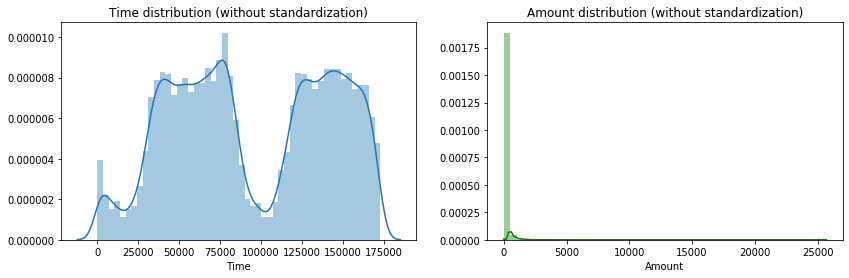

In [10]:
f, ax = plt.subplots(1,2, figsize=(14,4))
ax[0].set_title("Time distribution (without standardization)")
ax[1].set_title("Amount distribution (without standardization)")
sns.distplot(a=df["Time"], ax=ax[0])
sns.distplot(a=df["Amount"], ax=ax[1], color="g")


## Normalisation des variables Amount et Time  

### On observe que Time et Amount ne sont pas à la même échelle que les autres variables.On va donc utiliser MinMaxScaler pour remédier à cela


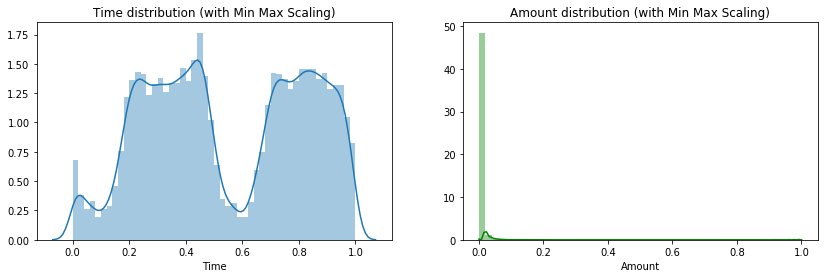

In [11]:
#Min Max scaling
scaler = MinMaxScaler()
scaled_time = scaler.fit_transform(df["Time"].values.reshape(-1,1))
scaled_amount = scaler.fit_transform(df["Amount"].values.reshape(-1,1))
#distribution

f, ax = plt.subplots(1,2, figsize=(14,4))
ax[0].set_title("Time distribution (with Min Max Scaling)")
ax[1].set_title("Amount distribution (with Min Max Scaling)")
ax[0].set_xlabel("Time")
ax[1].set_xlabel("Amount")
sns.distplot(a=scaled_time, ax=ax[0])
sns.distplot(a=scaled_amount, ax=ax[1], color="g")

#on remplace par les valeurs mises à l'échelle :
df["Time"] = scaled_time 
df["Amount"] = scaled_amount

## Observons maintenant à quel point notre Dataset est déséquilibré

In [12]:
non_fraud, fraud = df["Class"].value_counts(normalize=True).values

print(f"Frequency of Non Fraud transactions : {round(non_fraud * 100,2)} % ")
print("-"*5)
print(f"Frequency of Fraud transactions : {round(fraud * 100,2)} % ")
print("-"*5)
print(df)

Frequency of Non Fraud transactions : 99.83 % 
-----
Frequency of Fraud transactions : 0.17 % 
-----
            Time         V1         V2        V3        V4        V5  \
0       0.000000  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1       0.000000   1.191857   0.266151  0.166480  0.448154  0.060018   
2       0.000006  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3       0.000006  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4       0.000012  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  0.999965 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  0.999971  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  0.999977   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  0.999977  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  1.000000  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        

Text(0.5, 1.0, 'Barplot Class')

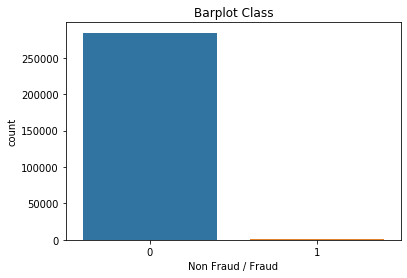

In [13]:
# Visualisons cela : 

ax = sns.countplot(data=df, x="Class")
ax.set_xlabel("Non Fraud / Fraud")
ax.set_title("Barplot Class")

### Conclusion de ce déséquilibre : On va devoir utiliser des méthodes de down sampling ou de upsampling pour palier ce problème. Nous y reviendrons

# Etudions la corrélation de nos variables 

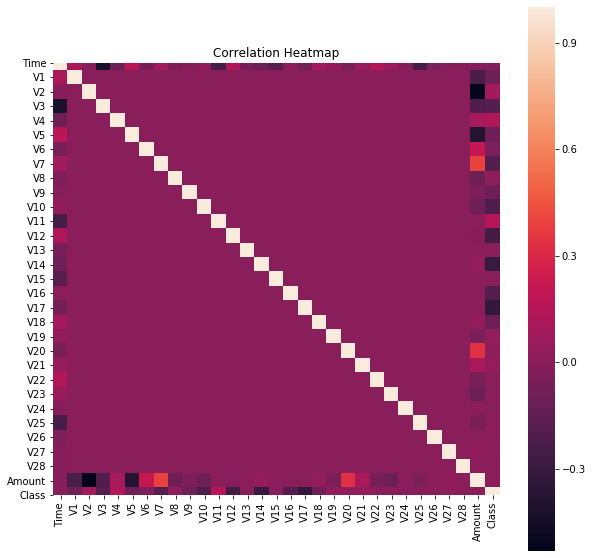

In [14]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data=corr, square=True)
plt.title("Correlation Heatmap")
plt.show()


In [15]:
df =df.sample(frac=1)
X = df[[col for col in df.columns if col != "Class"]] 
y = df["Class"]
print(len(df))


284807


In [16]:
# pca pour visualisation 
X_small = X[["V14", "V2","V4","V11", "V10","V14","V16"]]
pca = PCA(n_components=2)
x_vis = pca.fit_transform(X_small) 

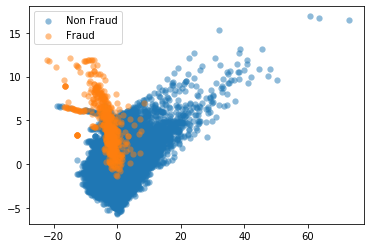

In [17]:
palette = sns.color_palette()
plt.scatter(x_vis[y==0, 0], x_vis[y==0, 1], label="Non Fraud", alpha=0.5, facecolor=palette[0], linewidth=0.15)
plt.scatter(x_vis[y==1, 0], x_vis[y==1, 1], label="Fraud", alpha=0.5, facecolor=palette[1], linewidth=0.15)
plt.legend()
plt.show()

In [18]:
#essayons différentes techniques de sampling
#undersampling

rand_under = RandomUnderSampler(random_state=42)
X_rand_under, y_rand_under = rand_under.fit_resample(X, y)

nearmiss = NearMiss()
X_nearmiss, y_nearmiss = nearmiss.fit_resample(X, y)

print(len(df))

284807


In [19]:
#modification de la taille 
print(f"Size after random_undersampling : {len(X_rand_under)}")
print(f"Size after nearmiss : {len(X_nearmiss)}")

Size after random_undersampling : 984
Size after nearmiss : 984


In [20]:
pca = PCA(n_components=2) 
X_reduced_ran = pca.fit_transform(X_rand_under)
X_reduced_near = pca.fit_transform(X_nearmiss)
print(len(df))

284807


In [21]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne_rand_under = tsne.fit_transform(X_rand_under)
X_tsne_near = tsne.fit_transform(X_nearmiss)
print(len(df))

284807


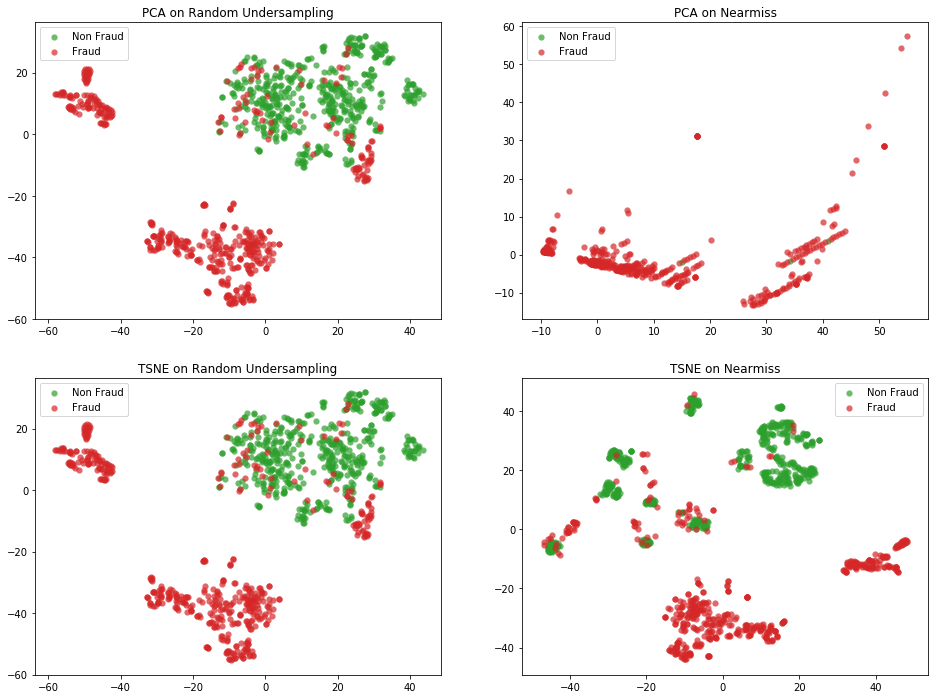

284807


In [22]:
#visualisation 
palette = sns.color_palette()

f, ax = plt.subplots(2,2, figsize=(16,12))

#Random Undersampling
ax[0][0].set_title("PCA on Random Undersampling")
ax[0][0].scatter(X_tsne_rand_under[y_rand_under==0, 0], X_tsne_rand_under[y_rand_under==0, 1], label="Non Fraud", alpha=0.7, facecolor=palette[2], linewidth=0.15)
ax[0][0].scatter(X_tsne_rand_under[y_rand_under==1, 0], X_tsne_rand_under[y_rand_under==1, 1], label="Fraud", alpha=0.7, facecolor=palette[3], linewidth=0.15)
ax[0][0].legend()
#Nearmiss
ax[0][1].set_title("PCA on Nearmiss")
ax[0][1].scatter(X_reduced_near[y_nearmiss==0, 0], X_reduced_near[y_nearmiss==0, 1], label="Non Fraud", alpha=0.7, facecolor=palette[2], linewidth=0.15)
ax[0][1].scatter(X_reduced_near[y_nearmiss==1, 0], X_reduced_near[y_nearmiss==1, 1], label="Fraud", alpha=0.7, facecolor=palette[3], linewidth=0.15)
ax[0][1].legend()


ax[1][0].set_title("TSNE on Random Undersampling")
ax[1][0].scatter(X_tsne_rand_under[y_rand_under==0, 0], X_tsne_rand_under[y_rand_under==0, 1], label="Non Fraud", alpha=0.7, facecolor=palette[2], linewidth=0.15)
ax[1][0].scatter(X_tsne_rand_under[y_rand_under==1, 0], X_tsne_rand_under[y_rand_under==1, 1], label="Fraud", alpha=0.7, facecolor=palette[3], linewidth=0.15)
ax[1][0].legend()


ax[1][1].set_title("TSNE on Nearmiss")
ax[1][1].scatter(X_tsne_near[y_nearmiss==0, 0], X_tsne_near[y_nearmiss==0, 1], label="Non Fraud", alpha=0.7, facecolor=palette[2], linewidth=0.15)
ax[1][1].scatter(X_tsne_near[y_nearmiss==1, 0], X_tsne_near[y_nearmiss==1, 1], label="Fraud", alpha=0.7, facecolor=palette[3], linewidth=0.15)
ax[1][1].legend()



plt.legend()
plt.show()
print(len(df))

* **TSNE arrive à bien séparer les fraudes**
* **TSNE fonctionne bien avec les deux techniques d'under sampling**


## Analyse de correlations

In [23]:
#Building datasets 

df_ran_und = pd.concat([X_rand_under, y_rand_under],axis=1)
df_nearmiss = pd.concat([X_nearmiss, y_nearmiss], axis=1)

#shuffling
df_ran_und = df_ran_und.sample(frac=1)
df_nearmiss = df_nearmiss.sample(frac=1)
print(len(df))

284807


Correlation heatmap for RandomUnderSampling
--------------------------------------------------
Correlation heatmap for Nearmiss
--------------------------------------------------
284807


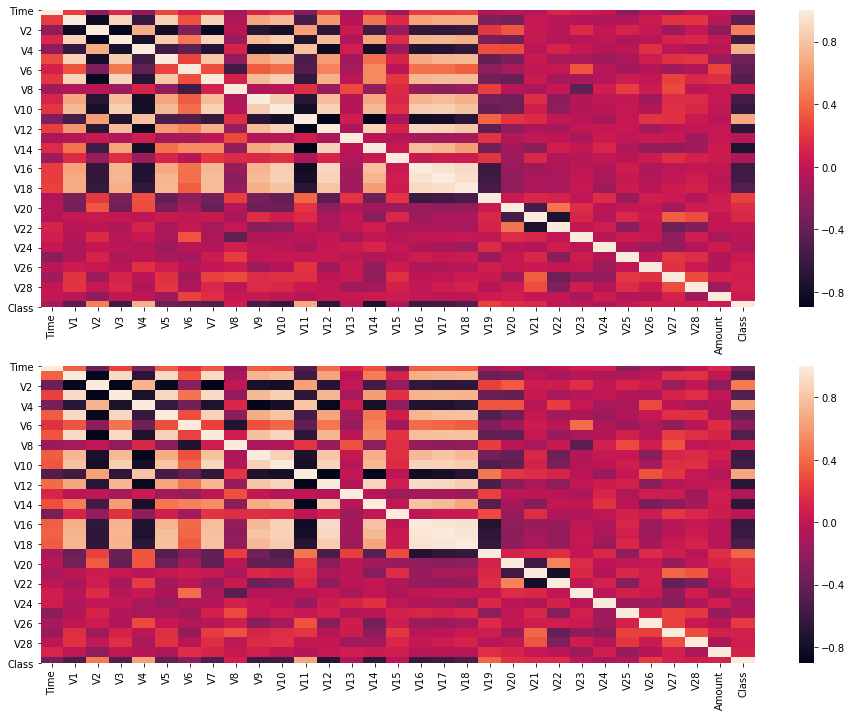

In [24]:
palette = sns.color_palette()
sampling = {"RandomUnderSampling" : df_ran_und, "Nearmiss": df_nearmiss}

f, ax = plt.subplots(2,1, figsize=(16,12))
i = 0
for sample, df_sampled in sampling.items():
    print(f"Correlation heatmap for {sample}")
    corr = df_sampled.corr()
    sns.heatmap(data=corr, ax=ax[i])
    i += 1
    print("-"*50)
print(len(df))

* **La CorrelationHeatmap est la même selon la technique**


### Feature Selection

## Feature selection process 
* **Variance Threshold**
* **Chi 2 test**
* **Correlation Analysis (undersampled)**  

In [25]:
print(len(X)) # Entire dataset ! 
print(len(df))

284807
284807


In [26]:
#Variance threshold (WHOLD DS)
threshold = 0.2
selector = VarianceThreshold(threshold)
selected_col = selector.fit_transform(X)
selected_col = selector.get_support(indices=True)
unselected_col = [x for x in df.columns if x not in df.columns[selected_col] and x != "Class"]
print(f"Variable with a variance lower than {threshold * 100}% : {unselected_col}")
print(len(df))

Variable with a variance lower than 20.0% : ['Time', 'V27', 'V28', 'Amount']
284807


In [27]:
#chi 2 (WHOLD DS)

#We keep X_best on the side
selector = SelectKBest(score_func=f_classif)
selector.fit_transform(X,y)
print(f"Selected Feature ANOVA: {X.columns[selector.get_support()]}")
print("-"*20)
# mutual_info_classif : depence between X and y
selector = SelectKBest(score_func=mutual_info_classif)
selector.fit(X,y)
print(f"After mutal_info test : {X.columns[selector.get_support()]} ")
print(len(df))

Selected Feature ANOVA: Index(['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18'], dtype='object')
--------------------
After mutal_info test : Index(['V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18'], dtype='object') 
284807


In [28]:
#We are keeping after the statistic tests ! 
features = X.columns[selector.get_support()]
new_X = X[features].copy()
print(len(df))

284807


Size after Neamiss : 984
284807


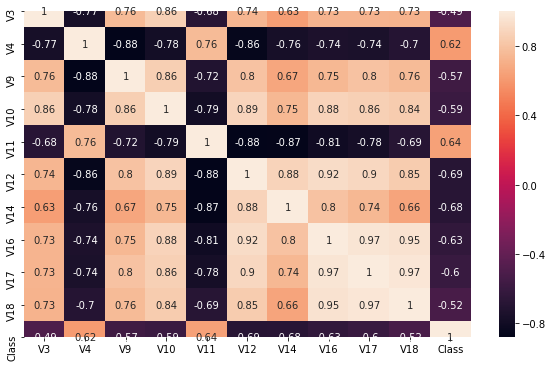

In [29]:
#As random undersampling and Nearmiss lead to the same correlation Heatmap 
# let's check the correlatio, heatmap using nearmiss 
palette = sns.color_palette()
fig = plt.figure(figsize=(10,6))
nearmiss = NearMiss()
new_X_under, new_y_under = nearmiss.fit_resample(new_X, y)

new_df_under = pd.concat([new_X_under, new_y_under], axis=1)
print(f"Size after Neamiss : {len(new_df_under)}")
corr = new_df_under.corr() 
#correlation after feature selection using statistic tests
sns.heatmap(corr, annot=True)
print(len(df))

In [30]:
# selecting top 3 postively and negatively correlated features 

#Number of features to select
n = 4

pos_feat = corr["Class"].nlargest(n=n+2).drop("Class").index
print(f"{pos_feat} : pos")
neg_feat = corr["Class"].sort_values(ascending=True)[:n].index
print(f"{neg_feat} : neg")
print(len(df))

Index(['V11', 'V4', 'V3', 'V18', 'V9'], dtype='object') : pos
Index(['V12', 'V14', 'V16', 'V17'], dtype='object') : neg
284807


### Let's visualize the impact of these features on Class

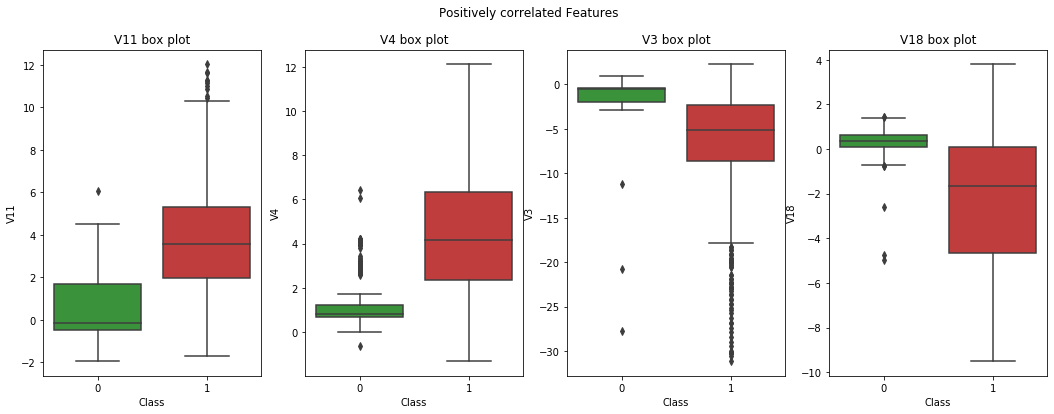

284807


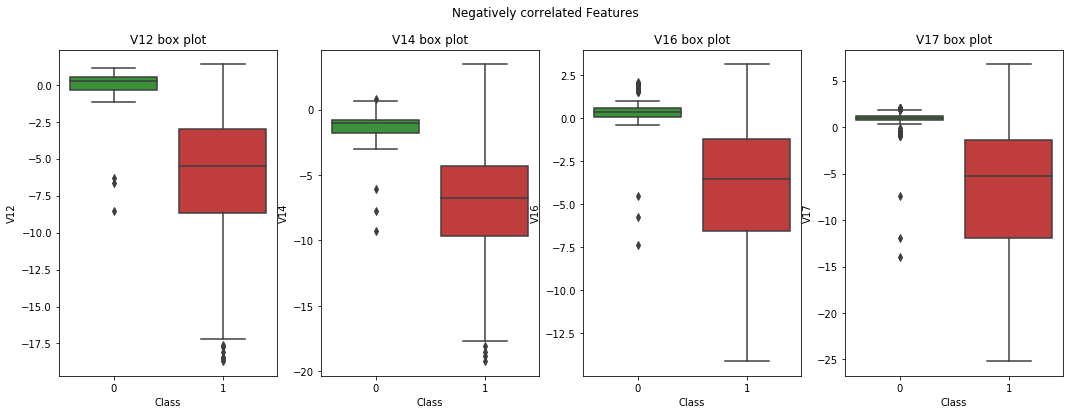

In [31]:
f, ax = plt.subplots(1,4, figsize=(18,6))
plt.suptitle("Positively correlated Features")
for i in range(4): 
    sns.boxplot(x="Class", y=pos_feat[i], data=new_df_under, palette=[palette[2], palette[3]], ax=ax[i])
    ax[i].set_title(f"{pos_feat[i]} box plot")
plt.show()

f, ax = plt.subplots(1,4, figsize=(18,6))
plt.suptitle("Negatively correlated Features")
for i in range(4): 
    sns.boxplot(x="Class", y=neg_feat[i], data=new_df_under, palette=[palette[2], palette[3]], ax=ax[i])
    ax[i].set_title(f"{neg_feat[i]} box plot")
print(len(df))

### 'V3' has a lot of outliers. We will train the model without and and compare by replacing V3 by a relevant feature

In [32]:
feat0 = [col for col in df.columns]
feature_set = {
    #selected from stat tests (whole dataset) + correlation (undersampled)
    "feat_0" : feat0,
    "feat_1" : ["V11", "V4", "V18", "V12", "V14", "V16", "V17"], 
}

## GridSearch Fine Tuning 

# Using feature set 0 (all features)

In [81]:
X_feat0 = df[feat0] 
y_feat0 = df["Class"]
test_size = 0.2
X_ft0_train, X_ft0_test, y_ft0_train, y_ft0_test = train_test_split(X_feat0,y_feat0, test_size=test_size)


In [34]:
#Classifiers 

classifiers = {
    "LogisticRegression" : LogisticRegression(max_iter=400), 
    "SVC" : SVC(), 
    "KNN" : KNeighborsClassifier(), 
    "RandomForest" : RandomForestClassifier()
}

parameters = {
    "LogisticRegression" : {"penalty" : ['l2'], "C":[0.001, 0.01, 0.1, 1, 10, 100, 1000], "solver" : ['newton-cg']}, 
    "SVC" : {"C":[0.001, 0.01, 0.1, 1, 10, 100, 1000]}, 
    "KNN" : {"n_neighbors": [int(x) for x in np.linspace(2,20,20)]}, 
    "RandomForest" : {"n_estimators": [int(x) for x in np.linspace(200,2000,10)], "max_depth" : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]}
}

In [35]:
# grid search

best_estimators = {"LogisticRegression" : None, "SVC": None, "KNN" : None, "RandomForest" : None}

for clf_name, clf in classifiers.items(): 
    filename = f"FEATURE_SET_0/gridsearchV0/{clf_name}_gridsearchcv.pickle"
    try: 
        with open(filename) as f: 
            print(f"{clf_name} has already been Grid Searched ...")
    except IOError:  
        print(f"Running GridSearchCV on {clf_name} ... (Random undersample data search)")
        grid_clf = GridSearchCV(clf, parameters[clf_name], n_jobs=5,scoring="recall")
        X_train_under, y_train_under = RandomUnderSampler(random_state=42).fit_resample(X_feat0, y_feat0)
        grid_clf.fit(X_train_under, y_train_under)
        best_estimators[clf_name] = grid_clf.best_estimator_
        print(f"Best estimator : {best_estimators[clf_name]}")
        print("serializing ... \n")
        #serializing
        os.makedirs(os.path.dirname(filename), exist_ok=True) #doesn't raise any error if exists, creates the directory otherwise
        with open(filename, "wb") as f: 
            pickle.dump({clf_name : grid_clf.best_estimator_}, f)
        print("-"*50)

LogisticRegression has already been Grid Searched ...
SVC has already been Grid Searched ...
KNN has already been Grid Searched ...
RandomForest has already been Grid Searched ...


In [36]:
best_estimators = {} 
print("Final Best estimators ..")
print()
for clf_name in classifiers: 
    best_estimators[clf_name] = pickle.load(open(f"FEATURE_SET_0/gridsearchV0/{clf_name}_gridsearchcv.pickle", "rb"))[clf_name]
    print(best_estimators[clf_name])
    print("-"*50)
    
log_reg = best_estimators["LogisticRegression"]
svc = best_estimators["SVC"]
knn = best_estimators["KNN"]
random_forest = best_estimators["RandomForest"]


Final Best estimators ..

LogisticRegression(C=1000, max_iter=400, solver='newton-cg')
--------------------------------------------------
SVC(C=10)
--------------------------------------------------
KNeighborsClassifier(n_neighbors=3)
--------------------------------------------------
RandomForestClassifier(max_depth=10, n_estimators=200)
--------------------------------------------------


### Cross validation trying multiple undersampling techniques

In [42]:
#TODO : 

# RUN SEPERATE MODEL METRICS BY SAMPLING TECHNIQUES

sss = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def classifiers_metrics(sampling_strat, sampling_strat_name): 
    
    '''
        return model_metrics using cross validation regarding the sampling_strategy used for each classifiers
    '''
    
    model_metrics = {k:{"accuracy" : [], "precision" : [], "f1" : [], "recall" : [], "roc_auc" : [] } for k in best_estimators}
    
    for name, clf in best_estimators.items(): 
        filename = f"FEATURE_SET_0/evaluation/undersampling/{sampling_strat_name}/{name}.pickle"
        try: 
            with open(filename) as f: 
                print(f"{name} has already been Evaluated ...")
        except IOError:  
            print(f"Running cross validation on {name} :")
            print(f"Sampling strategy : {sampling_strat_name}")
            #Cross validation  
            for train_idx, test_idx in sss.split(X_ft0_train,y_ft0_train): 
                model = make_pipeline(sampling_strat, clf)
                #training ...
                model.fit(X_ft0_train.iloc[train_idx], y_ft0_train.iloc[train_idx]) 
                #predictions  
                predictions = model.predict(X_ft0_train.iloc[test_idx])
                #accuracy 
                model_metrics[name]["accuracy"].append(model.score(X_ft0_train.iloc[test_idx], y_ft0_train.iloc[test_idx])) 
                #precision : The precision is intuitively the ability of the classifier not to label as positive a sample that is negative
                model_metrics[name]["precision"].append(precision_score(y_ft0_train.iloc[test_idx], predictions)) 
                #f1
                model_metrics[name]["f1"].append(f1_score(y_ft0_train.iloc[test_idx], predictions))
                #recall : The recall is intuitively the ability of the classifier to find all the positive samples
                model_metrics[name]["recall"].append(recall_score(y_ft0_train.iloc[test_idx], predictions))
                #roc_auc  
                model_metrics[name]["roc_auc"].append(roc_auc_score(y_ft0_train.iloc[test_idx], predictions))
                #serializing  
                os.makedirs(os.path.dirname(filename), exist_ok=True) #doesn't raise any error if exists, creates the directory otherwise
                with open(f"FEATURE_SET_0/evaluation/undersampling/{sampling_strat_name}/{name}.pickle", "wb") as f: 
                    pickle.dump({name : model_metrics[clf_name]}, f)
            print(f"Evaluation using {sampling_strat_name} with {name} : DONE !")
            print()
    return model_metrics

# Nearmiss 
eval_nearmiss = classifiers_metrics(NearMiss(sampling_strategy='majority'), "NearMiss") 
# RandomUndersampling
eval_rand_und = classifiers_metrics(RandomUnderSampler(), "RandomUnderSampling")

Running cross validation on LogisticRegression :
Sampling strategy : NearMiss
Evaluation using NearMiss with LogisticRegression : DONE !

Running cross validation on SVC :
Sampling strategy : NearMiss
Evaluation using NearMiss with SVC : DONE !

Running cross validation on KNN :
Sampling strategy : NearMiss
Evaluation using NearMiss with KNN : DONE !

Running cross validation on RandomForest :
Sampling strategy : NearMiss
Evaluation using NearMiss with RandomForest : DONE !

Running cross validation on LogisticRegression :
Sampling strategy : RandomUnderSampling
Evaluation using RandomUnderSampling with LogisticRegression : DONE !

Running cross validation on SVC :
Sampling strategy : RandomUnderSampling
Evaluation using RandomUnderSampling with SVC : DONE !

Running cross validation on KNN :
Sampling strategy : RandomUnderSampling
Evaluation using RandomUnderSampling with KNN : DONE !

Running cross validation on RandomForest :
Sampling strategy : RandomUnderSampling
Evaluation using 

In [67]:
#utils 

def evaluation_to_df(evaluation): 
    '''
        return the evaluations of model in a pandas DataFrame
    '''
    df = pd.DataFrame(columns=["accuracy", "precision", "f1", "recall", "roc_auc"], index=evaluation.keys())
    for clf, evl in evaluation.items(): 
        for metric, value in evl.items(): 
            df.loc[clf][metric] = np.array(value).mean()
    return df
    

In [70]:
#nearmiss report 
e1 = evaluation_to_df(eval_nearmiss)
#random under sampling report
e2 = evaluation_to_df(eval_rand_und)

In [71]:
e1

,accuracy,precision,f1,recall,roc_auc
LogisticRegression,0.988883,0.136493,0.239187,1,0.994432
SVC,0.857969,0.0127994,0.0252477,1,0.928864
KNN,0.814778,0.00872505,0.0172827,0.932601,0.873589
RandomForest,0.818535,0.0110371,0.0217801,1,0.909114


In [72]:
e2

,accuracy,precision,f1,recall,roc_auc
LogisticRegression,0.999293,0.729463,0.837782,1,0.999646
SVC,0.994619,0.270589,0.41644,0.997403,0.996009
KNN,0.974711,0.059415,0.111356,0.911955,0.943386
RandomForest,0.999737,0.867187,0.92845,1,0.999868


## Learning Curve 

In [91]:
#utility 
def plot_learning_curve(estimator, estimator_name, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5), index=0):
    '''
        Generate the test and training learning curve
    '''
    filename = f"FEATURE_SET_0/learning_curve/{estimator_name}.pickle"
    try : 
        with open(filename) as f: 
            print(f"You have already got the learning curve for {estimator_name}")
            return
    except IOError: 
        train_sizes, train_scores, test_scores, fit_times, _ = \
            learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                           train_sizes=train_sizes,
                           return_times=True, verbose=10)

        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        fit_times_mean = np.mean(fit_times, axis=1)
        fit_times_std = np.std(fit_times, axis=1)

        #serializing ... 
        os.makedirs(os.path.dirname(filename), exist_ok=True) #doesn't raise any error if exists, creates the directory otherwise
        with open(filename, "wb") as f: 
            pickle.dump({
                "train_scores_mean" : train_scores_mean, 
                "train_scores_std" : train_scores_std, 
                "test_scores_mean" : test_scores_mean, 
                "test_scores_std" : test_scores_std, 
                "fit_times_mean" : fit_times_mean, 
                "fit_times_std" : fit_times_std
            }, f)

        axes[index].grid()
        axes[index].fill_between(train_sizes, train_scores_mean - train_scores_std,
                             train_scores_mean + train_scores_std, alpha=0.1,
                             color="r")
        axes[index].fill_between(train_sizes, test_scores_mean - test_scores_std,
                             test_scores_mean + test_scores_std, alpha=0.1,
                             color="g")
        axes[index].plot(train_sizes, train_scores_mean, 'o-', color="r",
                     label="Training score")
        axes[index].plot(train_sizes, test_scores_mean, 'o-', color="g",
                     label="Cross-validation score")
        axes[index].legend(loc="best")

        return plt

[learning_curve] Training set sizes: [ 68 223 378 533 688]


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   3 out of  50 | elapsed:    0.0s remaining:    0.9s
[Parallel(n_jobs=5)]: Done   9 out of  50 | elapsed:    0.0s remaining:    0.3s
[Parallel(n_jobs=5)]: Done  15 out of  50 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=5)]: Done  21 out of  50 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done  27 out of  50 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done  33 out of  50 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  39 out of  50 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  45 out of  50 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed:    0.3s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


[learning_curve] Training set sizes: [ 68 223 378 533 688]


[Parallel(n_jobs=5)]: Done   3 out of  50 | elapsed:    0.0s remaining:    2.0s
[Parallel(n_jobs=5)]: Done   9 out of  50 | elapsed:    0.1s remaining:    0.6s
[Parallel(n_jobs=5)]: Done  15 out of  50 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=5)]: Done  21 out of  50 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=5)]: Done  27 out of  50 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done  33 out of  50 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  39 out of  50 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  45 out of  50 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   3 out of  50 | elapsed:    0.0s remaining:    0.7s
[Parallel(n_jobs=5)]: Done   9 out of  50 | elapsed:    0.0s remaining:    0.3s
[Parallel(n_jobs=5)]: Done  15 out of  50 | elapsed:   

[learning_curve] Training set sizes: [ 68 223 378 533 688]


[Parallel(n_jobs=5)]: Done  27 out of  50 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done  33 out of  50 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  39 out of  50 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  45 out of  50 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed:    0.3s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


[learning_curve] Training set sizes: [ 68 223 378 533 688]


[Parallel(n_jobs=5)]: Done   3 out of  50 | elapsed:    0.2s remaining:    4.5s
[Parallel(n_jobs=5)]: Done   9 out of  50 | elapsed:    0.5s remaining:    2.8s
[Parallel(n_jobs=5)]: Done  15 out of  50 | elapsed:    0.9s remaining:    2.2s
[Parallel(n_jobs=5)]: Done  21 out of  50 | elapsed:    1.2s remaining:    1.7s
[Parallel(n_jobs=5)]: Done  27 out of  50 | elapsed:    1.5s remaining:    1.3s
[Parallel(n_jobs=5)]: Done  33 out of  50 | elapsed:    1.9s remaining:    0.9s
[Parallel(n_jobs=5)]: Done  39 out of  50 | elapsed:    2.2s remaining:    0.6s
[Parallel(n_jobs=5)]: Done  45 out of  50 | elapsed:    2.6s remaining:    0.2s
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed:    2.9s finished


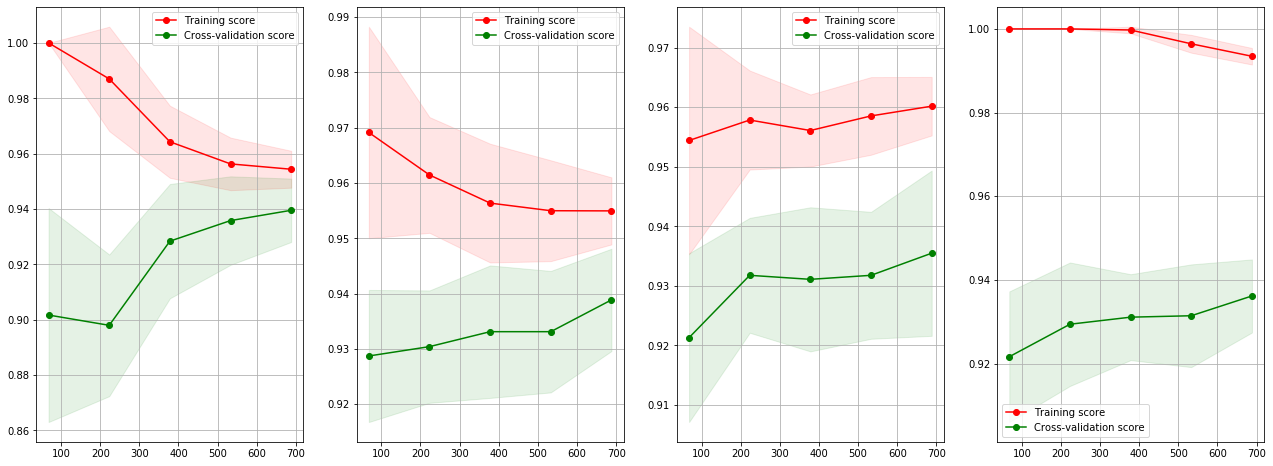

In [93]:
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
X_under, y_under = RandomUnderSampler(random_state=42).fit_resample(X,y)
f, ax = plt.subplots(1, len(best_estimators), figsize=(22,8))
for i,clf in enumerate(best_estimators): 
    estimator = best_estimators[clf]
    title = f"Learning curve {clf}"
    plot_learning_curve(estimator, clf, title, X_under, y_under, axes=ax, ylim=(0.7, 1.01),
                        cv=cv, n_jobs=5, index=i)

dict_keys(['LogisticRegression', 'SVC', 'KNN', 'RandomForest'])